# Q-1. 

Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.

Dataset This is the Dataset You can use this dataset for this question.


In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('F:\Python_DS_Assignment\instagram_reach.csv')

In [3]:
df.shape

(100, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [5]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   S.No               100 non-null    int64 
 1   USERNAME           100 non-null    object
 2   Caption            94 non-null     object
 3   Followers          100 non-null    int64 
 4   Hashtags           100 non-null    object
 5   Time since posted  100 non-null    object
 6   Likes              100 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


In [10]:
# Since Sr.No and Username are not relevant to our predictive model building we can drop it 
df.drop(columns=['S.No','USERNAME'],axis=1,inplace=True)

In [11]:
df.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [12]:
df['Caption']

0     Who are #DataScientist and what do they do? >>...
1     We all know where it’s going. We just have to ...
2     Alexander Barinov: 4 years as CFO in multinati...
3                                                  sfad
4     Ever missed a call while your phone was chargi...
                            ...                        
95    328 S. Wetherly Drive, Beverly Hills, CA 90212...
96    Credit @tristankappel To find more dvlp follow...
97    We are coming up with the Best 21 Books that w...
98    We’re only paid to move dirt once. It’s not ju...
99                      Obtén tu tienda en línea ahora.
Name: Caption, Length: 100, dtype: object

In [13]:
print(df['Caption'].describe())

count                                                    94
unique                                                   94
top       Who are #DataScientist and what do they do? >>...
freq                                                      1
Name: Caption, dtype: object


Explore hashtags and metion hashtag counts

In [14]:
# Example for extracting hashtags
hashtags = df['Caption'].str.findall(r'#(\w+)').explode()
hashtags_counts = hashtags.value_counts()

In [15]:
hashtags_counts

Caption
AI                      7
MachineLearning         5
IoT                     4
ai                      4
machinelearning         3
                       ..
aitrading               1
whoiswho                1
drawing                 1
sketches                1
theverticaldietfeeds    1
Name: count, Length: 117, dtype: int64

In [16]:
# filling missing values from Caption 
df = df.dropna(subset='Caption')

In [17]:
df.shape

(94, 5)

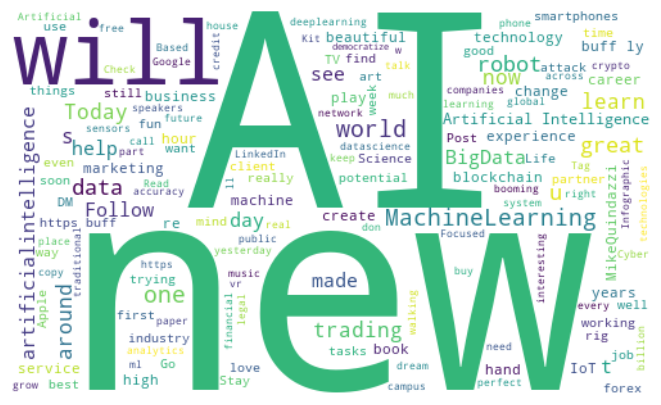

In [18]:
from wordcloud import WordCloud

# Example for generating a word cloud
wordcloud = WordCloud(width=500, height=300, max_words=150, background_color='white').generate(' '.join(df['Caption']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

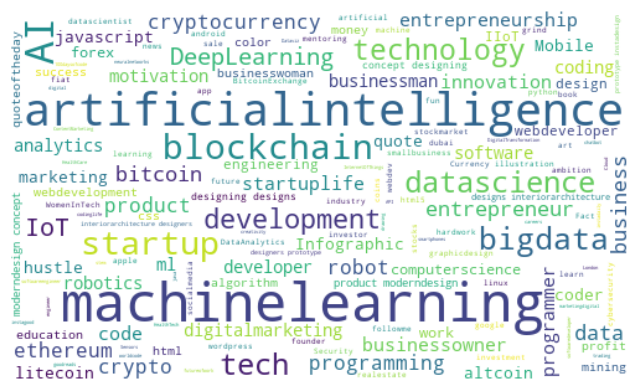

In [19]:
from wordcloud import WordCloud

# Example for generating a word cloud
wordcloud = WordCloud(width=500, height=300, max_words=150, background_color='white').generate(' '.join(df['Hashtags']))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

from hashtags  it clear peaple are posting more out machine learning and AI related contents or articles 

Changing Time posted from object to float 

In [20]:
import re 
df['Time since posted'] = df['Time since posted'].map(lambda x:int(re.sub('hours', '', x)))

Finding relation between Followers and Time when it posted 

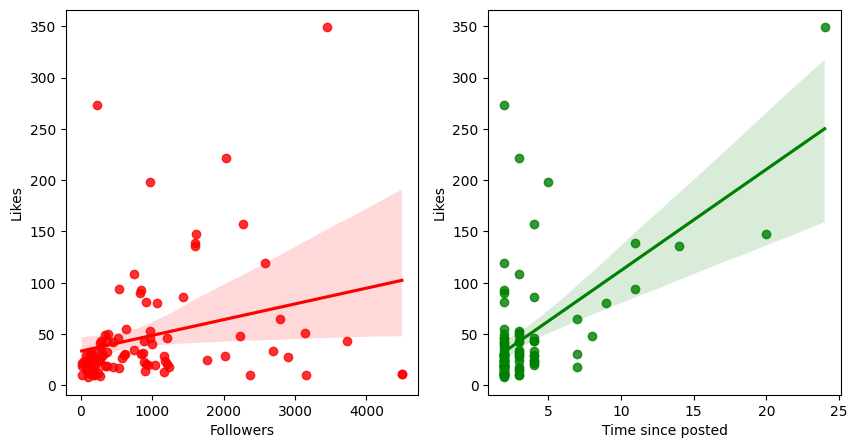

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('Followers')
plt.ylabel('Likes')
sns.regplot(data = df,x ='Followers', y ='Likes',color='red')
plt.subplot(1,2,2)
plt.xlabel('Time since posted')
plt.ylabel('Likes')
sns.regplot(data = df,x ='Time since posted', y ='Likes',color='green')
plt.show()

<Axes: xlabel='Likes', ylabel='Density'>

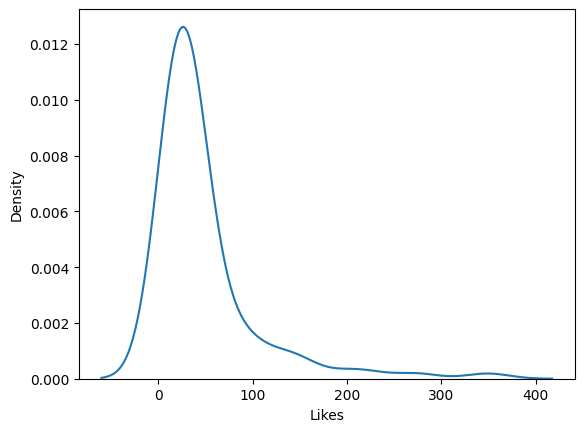

In [22]:
sns.kdeplot(df['Likes'])

In [23]:
df.head()

,Caption,Followers,Hashtags,Time since posted,Likes
0,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


# Predictive Modelling

In [62]:
# Since our taske is to develop predictive modelig with 2 target variables Number of Likes and Time since posted we have t use multioutputRegressor 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [63]:
df.columns

Index(['Caption', 'Followers', 'Hashtags', 'Time since posted', 'Likes'], dtype='object')

In [64]:
X=df.drop(columns=['Time since posted','Likes'],axis=1)
X.shape

(94, 3)

In [65]:
Y=df[['Time since posted','Likes']]
Y.shape

(94, 2)

In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Caption    94 non-null     object
 1   Followers  94 non-null     int64 
 2   Hashtags   94 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


In [67]:
categorical_features=['Caption','Hashtags']
numerical_features=['Followers']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y ,test_size=0.20,random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 3)
(19, 3)
(75, 2)
(19, 2)


In [53]:
# Applying Transformation on categorical and numerical features 
categorical_transformer = OneHotEncoder(drop='first',handle_unknown='ignore')
numerical_transformer=StandardScaler()

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [74]:
# Create a pipeline with preprocessing and model
# Define the model
model = RandomForestRegressor(random_state=42)

pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model',model)
    ]
)

In [75]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Followers']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Caption', 'Hashtags'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [ ]:
# Predictions on the test set
predictions = pipeline.predict(X_test)
predictions

In [77]:
# Evaluate the model
# You can use metrics like Mean Absolute Error (MAE) or Mean Squared Error (MSE)
# depending on the nature of your target variable
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 13.423421052631577


Prediction for New data 

In [90]:
df.iloc[11]

Caption              The IT industry is rapidly booming. Is your ca...
Followers                                                         2232
Hashtags             #WedenesdayWisdom #IndustryInsights#GetSkilled...
Time since posted                                                    8
Likes                                                               48
Name: 11, dtype: object

In [86]:
# Create a DataFrame for the new data point
new_data_point = pd.DataFrame({
    'Caption': ["The IT industry is rapidly booming. Is your ca..."],
    'Followers': [2232],
    'Hashtags': ["#WedenesdayWisdom #IndustryInsights#GetSkilled..."],
    'Time since posted': [8],
    'Likes': [48]
})

In [87]:
# Use the trained pipeline to transform and predict on the new data point
new_data_point_X = new_data_point[['Caption', 'Followers', 'Hashtags']]
new_data_point_predictions = pipeline.predict(new_data_point_X)

In [88]:
new_data_point_predictions

array([[ 2.24, 33.  ]])